In [1]:
import sys, os
sys.path.append(r"C:\Users\micha\OneDrive\Documents\code\pyfi\\")

from pyfi.base.retrievers import equity
from pyfi.analytics.time_series.stats.probability import Probability
from pyfi.analytics.time_series.stats.descriptive import Descriptive
from pyfi.core.underlying import Underlying
from pyfi.core.timeseries import TimeSeries, Frequency, AggFunc

import pandas as pd
import numpy as np

#https://arch.readthedocs.io/en/latest/univariate/forecasting.html

Garch

30
[*********************100%%**********************]  1 of 1 completed
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -381.846
Distribution:                  Normal   AIC:                           771.693
Method:            Maximum Likelihood   BIC:                           785.497
                                        No. Observations:                  233
Date:                Thu, Dec 07 2023   Df Residuals:                      232
Time:                        02:05:21   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
-----------------------------------------------------------------------

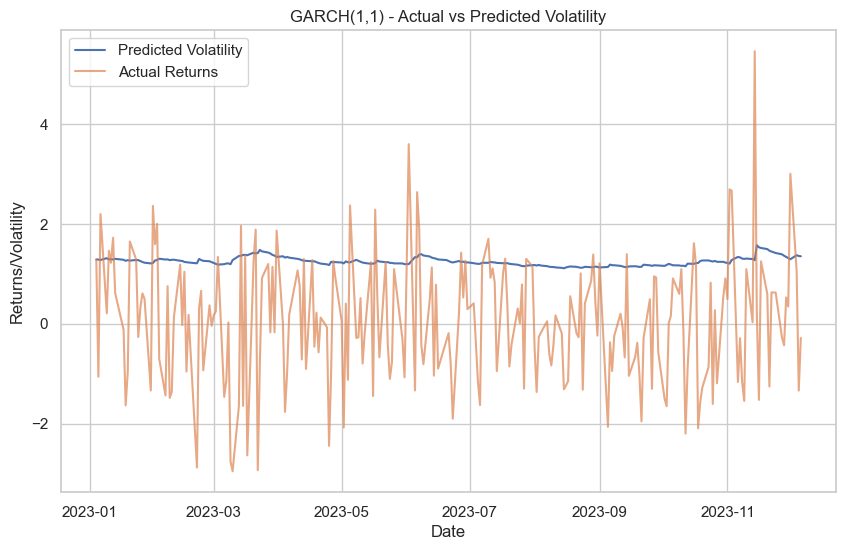

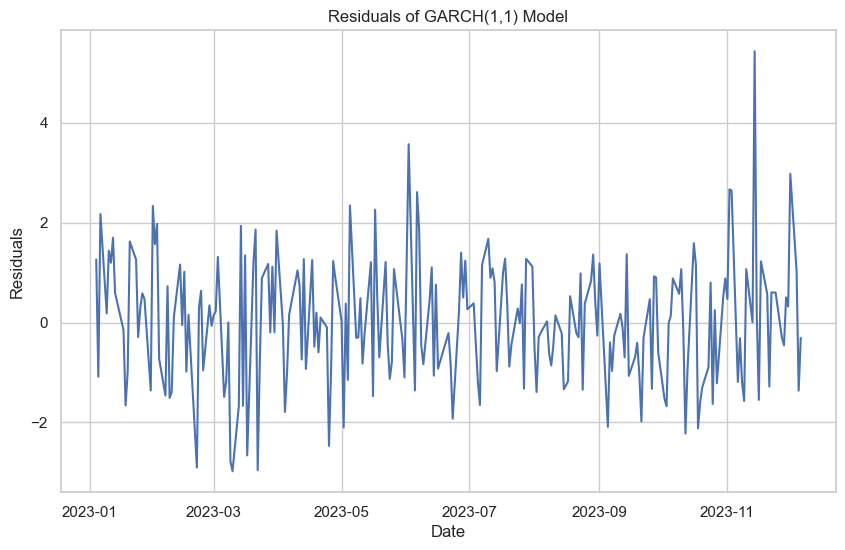

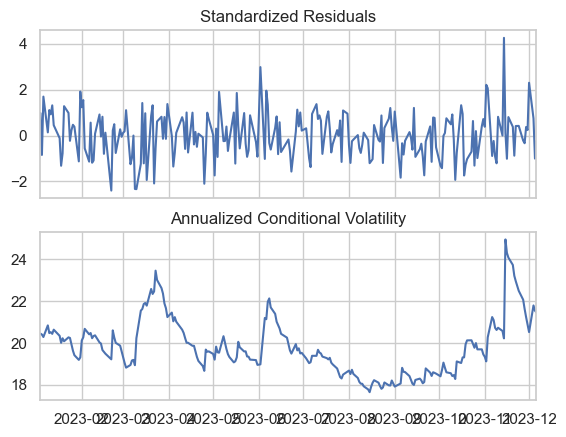

In [2]:
from pyfi.core.underlying import Underlying

asset = Underlying(ticker = 'VTWO')


asset.plot_garch()

Technicals

In [3]:
  # asset.plot_garch()
  asset.add_bollinger_bands()
  asset.add_rsi()
  asset.add_macd()
  asset.add_on_balance_volume()
  asset.df

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,bb_bbli,rsi,rsi_d,rsi_k,macd,macd_dif,macd_signal,obv
Date,,,,,,,,,,,,,,,,,,
2023-01-03,71.029999,71.550003,69.389999,69.959999,69.213257,1675100,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1675100
2023-01-04,70.480003,71.300003,70.339996,70.860001,70.103645,1539700,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3214800
2023-01-05,70.480003,70.510002,69.580002,70.110001,69.361656,1176100,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2038700
2023-01-06,70.760002,71.839996,70.169998,71.650002,70.885216,1193900,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3232600
2023-01-09,72.260002,72.680000,71.709999,71.800003,71.033615,1024000,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4256600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,72.779999,73.029999,72.300003,72.610001,72.610001,4023200,70.854499,74.208134,67.500865,0.0,0.0,0.832357,0.792263,0.788210,0.868528,0.221805,0.646723,10452100
2023-12-01,72.470001,74.870003,72.070000,74.790001,74.790001,3872400,71.159000,74.770819,67.547180,1.0,0.0,1.000000,0.817233,0.880385,1.050544,0.323057,0.727487,14324500
2023-12-04,74.440002,75.610001,74.400002,75.580002,75.580002,2986800,71.411500,75.488280,67.334719,1.0,0.0,1.000000,0.870905,0.944119,1.244197,0.413368,0.830829,17311300


Probability

In [4]:
df = equity.get_price_matrix(tickers = [ 'VTWO'], start_date='2023-01-01', end_date='2023-11-30')

[*********************100%%**********************]  1 of 1 completed


In [5]:
df.tail()

Date
2023-11-22    72.040001
2023-11-24    72.489998
2023-11-27    72.290001
2023-11-28    71.980003
2023-11-29    72.360001
Name: Close, dtype: float64

In [6]:
df = equity.get_return_matrix(tickers = ['VTWO'], start_date='2023-01-01', end_date='2023-11-30').multiply(100)

[*********************100%%**********************]  1 of 1 completed


In [7]:
prob = Probability(
    df = df,
)

In [8]:
prob.scenario_probabilites()

       -5.0    -4.5    -4.0    -3.5    -3.0    -2.5    -2.0    -1.5    -1.0   
Close   0.0  0.0001  0.0006  0.0023  0.0076  0.0214  0.0521  0.1107  0.2058  \

         -0.5  ...     0.5     1.0     1.5     2.0     2.5     3.0     3.5   
Close  0.3374  ...  0.3507  0.2162  0.1177  0.0561  0.0233  0.0084  0.0026  \

          4.0     4.5   5.0  
Close  0.0007  0.0002   0.0  

[1 rows x 22 columns]


P(x),-5.0,-4.5,-4.0,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,...,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
Close,0.0,0.0001,0.0006,0.0023,0.0076,0.0214,0.0521,0.1107,0.2058,0.3374,...,0.3507,0.2162,0.1177,0.0561,0.0233,0.0084,0.0026,0.0007,0.0002,0.0


In [9]:
prob.scenario_z_scores()

Z-score,-5.0,-4.5,-4.0,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,...,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
0,-4.0339,-3.6323,-3.2307,-2.8292,-2.4276,-2.026,-1.6244,-1.2228,-0.8212,-0.4196,...,0.3835,0.7851,1.1867,1.5883,1.9899,2.3914,2.793,3.1946,3.5962,3.9978


In [10]:
Descriptive(df=df).describe()

'Add logic to process series here...'

In [11]:
ts = TimeSeries(
    df = df,
)

In [12]:
ts.group(frequency = Frequency.WEEKLY_F, aggfunc=np.sum)

In [13]:
Descriptive(df=ts.df).describe()

'Add logic to process series here...'

Simulation

In [14]:

# from pyfi.analytics.time_series.stats.montecarlo import MonteCarlo
# from pyfi.base.retrievers import equity

# df = equity.get_price_matrix(tickers = ['VTWO'], start_date='2023-01-01', end_date='2023-11-30')

# mc = MonteCarlo(prices = df, num_simulations = 1000, n_periods = 30)
# simulated, full_simulation = mc.run()
# # mc.plot()

In [15]:
# mc.describe()

In [16]:
from pyfi.base.retrievers import options
from pyfi.core.options.options import Chain, Contract, OptionType, OptionExposure

ticker = 'TLT'
target_date = '2023-12-31'

calls, puts = options.get_option_chain(ticker = ticker, date = target_date, strike_bounds=0.05)

[*********************100%%**********************]  1 of 1 completed


Chain

In [17]:
optc = Chain(ticker = ticker, chain = puts, option_type = OptionType.PUT, option_exposure = OptionExposure.SHORT, spot = 94.5)
optc.processed_chain
# optc.processed_chain.to_excel('chain.xlsx')


21
[*********************100%%**********************]  1 of 1 completed
{'ticker': 'TLT', 'period': 21, '_spot': 94.5, 'option_type': -1, 'option_exposure': <OptionExposure.SHORT: 'Bid'>, 'valuation': Date(7,12,2023), 'expiration': Date(29,12,2023), 'premium': 0.0, 'K': 92.0, 'ivol': 0.0313, 'contract_id': 'TLT231229P00092000', 'rfr': 0.05}
21
[*********************100%%**********************]  1 of 1 completed
{'ticker': 'TLT', 'period': 21, '_spot': 94.5, 'option_type': -1, 'option_exposure': <OptionExposure.SHORT: 'Bid'>, 'valuation': Date(7,12,2023), 'expiration': Date(29,12,2023), 'premium': 0.0, 'K': 93.0, 'ivol': 0.0313, 'contract_id': 'TLT231229P00093000', 'rfr': 0.05}
21
[*********************100%%**********************]  1 of 1 completed
{'ticker': 'TLT', 'period': 21, '_spot': 94.5, 'option_type': -1, 'option_exposure': <OptionExposure.SHORT: 'Bid'>, 'valuation': Date(7,12,2023), 'expiration': Date(29,12,2023), 'premium': 0.0, 'K': 94.0, 'ivol': 0.015600000000000001, 'contra

,TLT231229P00092000,TLT231229P00093000,TLT231229P00094000,TLT231229P00095000,TLT231229P00096000,TLT231229P00097000,TLT231229P00098000,TLT231229P00099000,TLT231229P00100000
Last Trade Date,2023-12-06 3:57PM EST,2023-12-06 3:59PM EST,2023-12-06 3:59PM EST,2023-12-06 3:59PM EST,2023-12-06 3:56PM EST,2023-12-06 3:55PM EST,2023-12-06 3:53PM EST,2023-12-06 2:17PM EST,2023-12-06 3:58PM EST
Strike,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
Last Price,0.5,0.7,0.98,1.36,1.89,2.47,3.22,3.83,4.7
Bid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ask,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Change,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% Change,-,-,-,-,-,-,-,-,-
Volume,4109,900,3997,1546,576,150,46,14,504
Open Interest,0,0,0,0,0,0,0,0,0
Implied Volatility,3.13%,3.13%,1.56%,0.78%,0.00%,0.00%,0.00%,0.00%,0.00%


14
[*********************100%%**********************]  1 of 1 completed
{'ticker': 'TLT', 'period': 14, '_spot': 95.87000274658203, 'option_type': <OptionType.PUT: -1>, 'option_exposure': <OptionExposure.SHORT: 'Bid'>, 'valuation': Date(7,12,2023), 'expiration': Date(22,12,2023), 'premium': 4, 'K': 90.5, 'ivol': None, 'contract_id': None, 'rfr': 0.05}
14
[*********************100%%**********************]  1 of 1 completed
{'ticker': 'TLT', 'period': 14, '_spot': 95.87000274658203, 'option_type': <OptionType.PUT: -1>, 'option_exposure': <OptionExposure.LONG: 'Ask'>, 'valuation': Date(7,12,2023), 'expiration': Date(22,12,2023), 'premium': 2, 'K': 85.5, 'ivol': None, 'contract_id': None, 'rfr': 0.05}


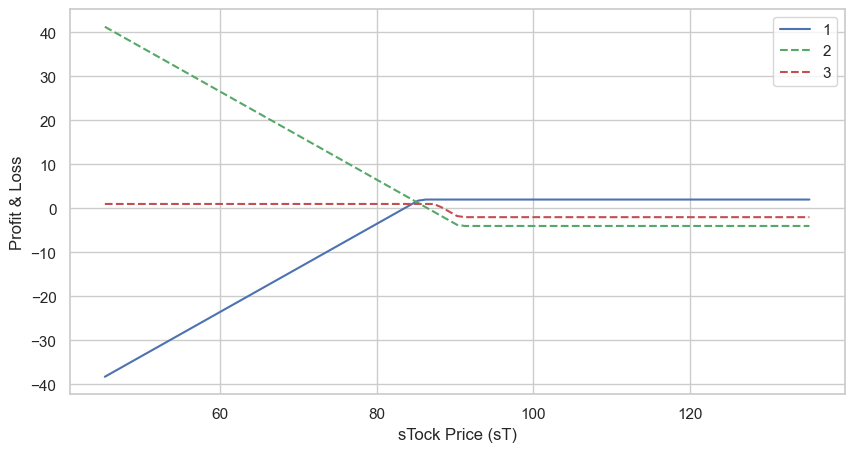

max profit: 200
max loss: 300.0
pl ratio: 0.6666666666666666 pl odds 1.5:1


In [18]:

from pyfi.core.options.strategies.vertical_put_spread import VerticalPutSpread
from pyfi.base.retrievers import options
from pyfi.core.options.options import Chain, Contract, OptionType, OptionExposure
import QuantLib as ql
from datetime import datetime
today = datetime.today()

leg_long = Contract(ticker='TLT', option_type = OptionType.PUT, option_exposure = OptionExposure.SHORT,
                valuation=ql.Date(today.day, today.month, today.year), expiration=ql.Date(22, 12, 2023), 
                premium=4, spot=None, K=90.5, ivol=None) 

leg_short = Contract(ticker='TLT', option_type = OptionType.PUT, option_exposure = OptionExposure.LONG,
                valuation=ql.Date(today.day, today.month, today.year), expiration=ql.Date(22, 12, 2023), 
                premium=2, spot=None, K=85.5, ivol=None) 

vps = VerticalPutSpread(clsLong=leg_long, clsShort=leg_short)
vps.plot()
print('max profit:', vps.max_profit)
print('max loss:', vps.max_loss)
print('pl ratio:', vps.pl_ratio,  'pl odds', f"{1/vps.pl_ratio}:1")
